In [1]:
# Instalación y configuración
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carga de datos
aapl_data = yf.download('AAPL', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [10]:
print(datos_aapl.head())

# Exploración de datos
datos_aapl.info()
datos_aapl.describe()
print(datos_aapl.isnull().sum())
print("No tenemos datos nulos :) ")
print(datos_aapl.columns)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-09-17  54.990002  55.205002  54.779999  55.174999  53.389759   73274800
2019-09-18  55.264999  55.712502  54.860001  55.692501  53.890514  101360000
2019-09-19  55.502499  55.939999  55.092499  55.240002  53.452663   88242400
2019-09-20  55.345001  55.639999  54.367500  54.432499  52.671280  221652400
2019-09-23  54.737499  54.959999  54.412498  54.680000  52.910778   76662000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-09-17 to 2024-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5

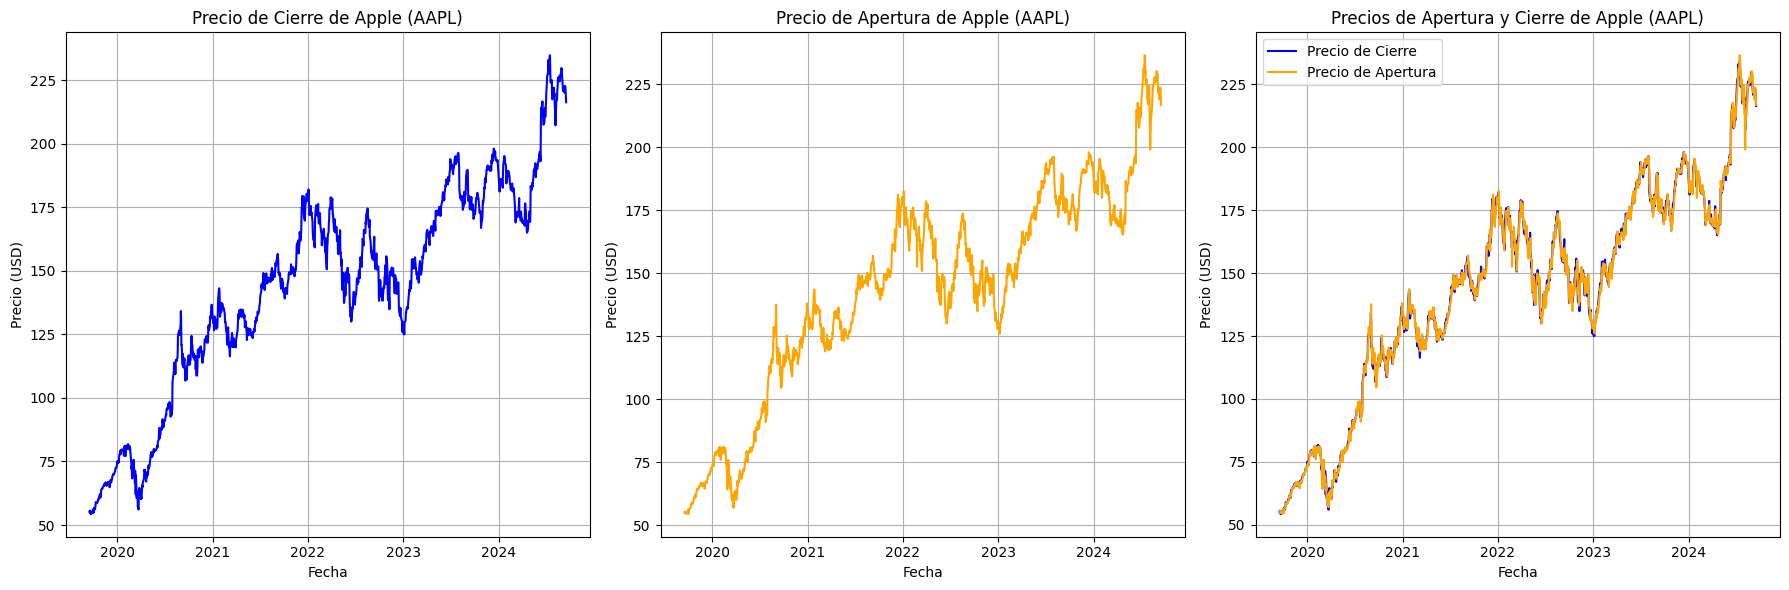

In [17]:
# Crear la figura con 3 subplots organizados en 1 fila y 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Tamaño de la figura ajustado para 3 gráficos

# Gráfico 1: Precio de Cierre
axs[0].plot(aapl_data.index, aapl_data['Close'], color='blue')
axs[0].set_title('Precio de Cierre de Apple (AAPL)')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio (USD)')
axs[0].grid(True)

# Gráfico 2: Precio de Apertura
axs[1].plot(aapl_data.index, aapl_data['Open'], color='orange')
axs[1].set_title('Precio de Apertura de Apple (AAPL)')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Precio (USD)')
axs[1].grid(True)

# Gráfico 3: Precio de Apertura y Cierre combinados
axs[2].plot(aapl_data.index, aapl_data['Close'], label='Precio de Cierre', color='blue')
axs[2].plot(aapl_data.index, aapl_data['Open'], label='Precio de Apertura', color='orange')
axs[2].set_title('Precios de Apertura y Cierre de Apple (AAPL)')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Precio (USD)')
axs[2].legend(loc='best')  # Añadir leyenda para identificar las líneas
axs[2].grid(True)

# Ajustar el espacio entre los subplots para una mejor visualización
plt.tight_layout()

# Mostrar la figura completa con las 3 gráficas
plt.show()

[*********************100%***********************]  1 of 1 completed


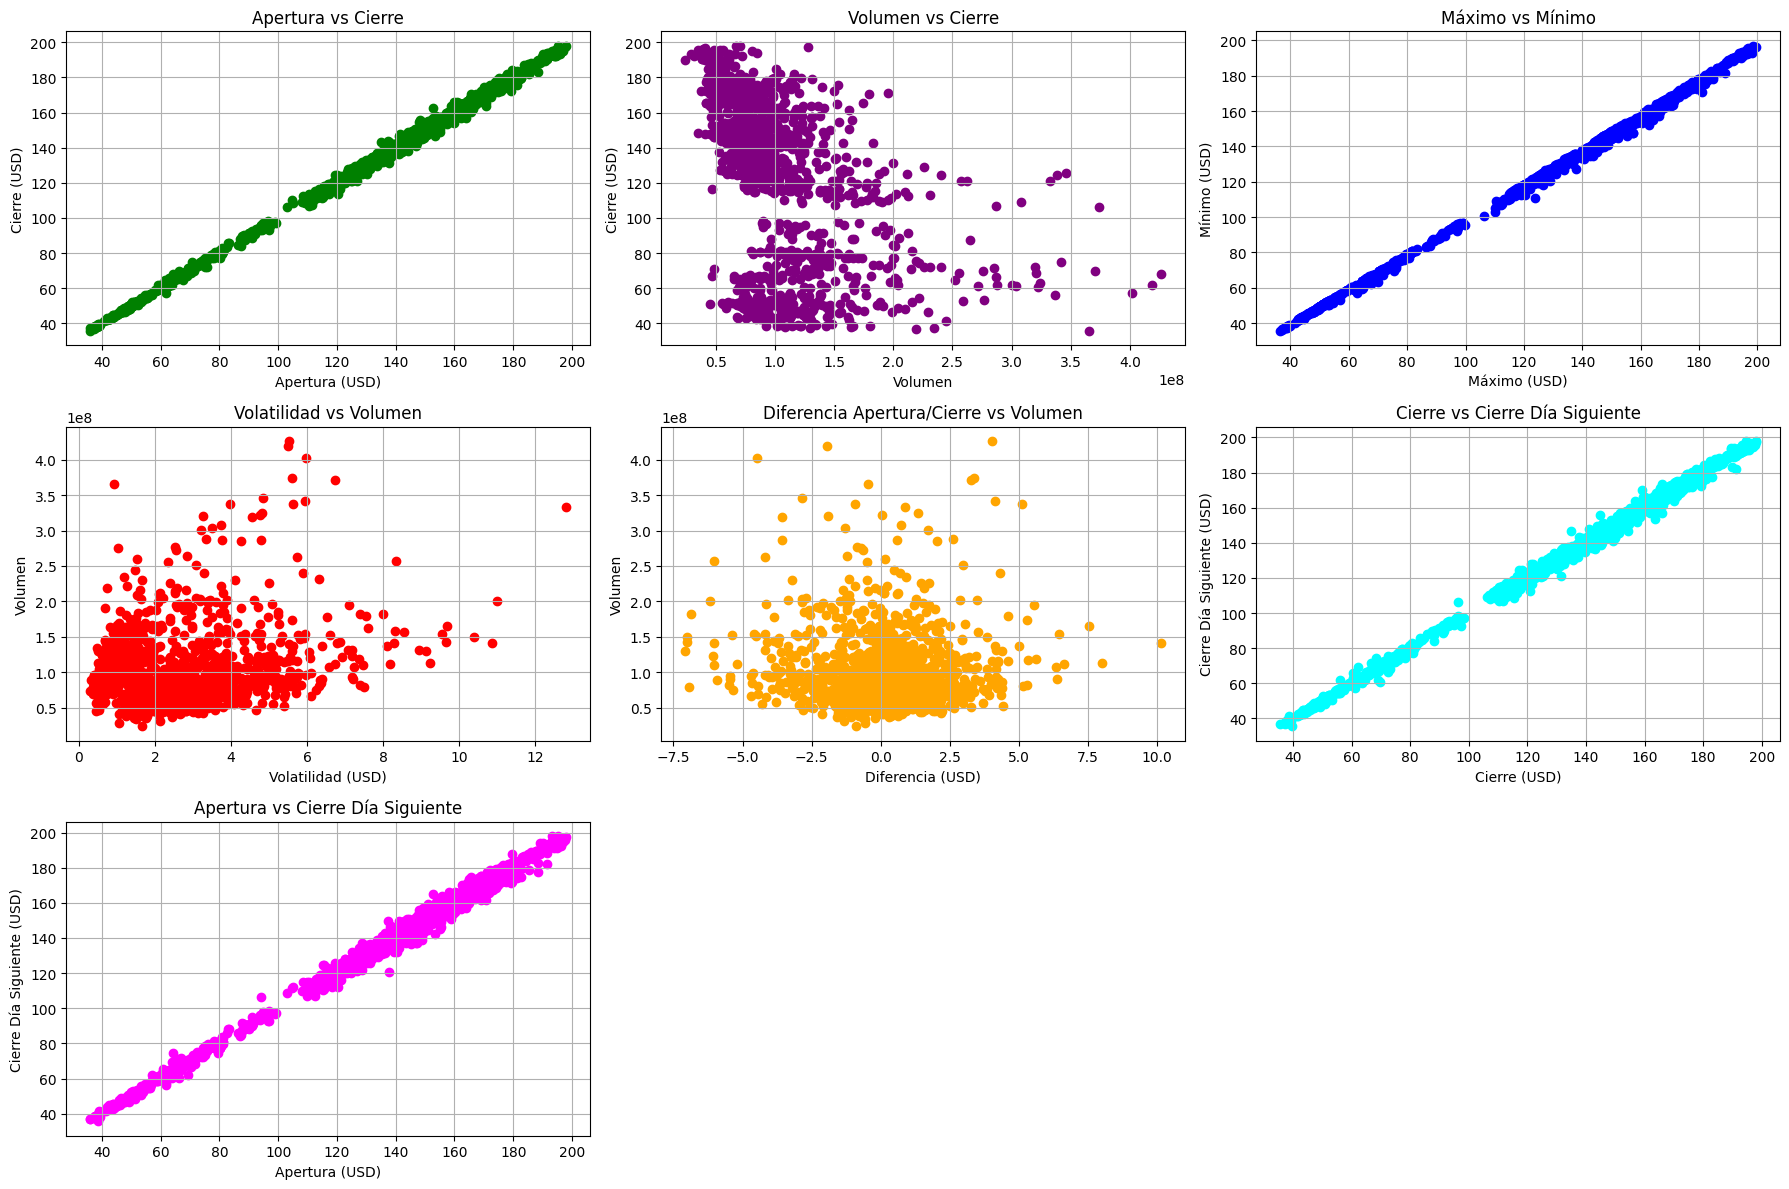

In [19]:
# Descargar datos de Apple
aapl_data = yf.download('AAPL', start='2019-01-01', end='2024-01-01')

# Calcular la volatilidad diaria como la diferencia entre el máximo y el mínimo
aapl_data['Volatility'] = aapl_data['High'] - aapl_data['Low']

# Crear la diferencia entre Apertura y Cierre
aapl_data['Diff_Open_Close'] = aapl_data['Close'] - aapl_data['Open']

# Crear la figura con un tamaño adecuado para las 7 subplots
plt.figure(figsize=(18, 12))

# 1. Precio de Apertura vs Precio de Cierre
plt.subplot(3, 3, 1)
plt.scatter(aapl_data['Open'], aapl_data['Close'], color='green')
plt.title('Apertura vs Cierre')
plt.xlabel('Apertura (USD)')
plt.ylabel('Cierre (USD)')
plt.grid(True)

# 2. Volumen vs Precio de Cierre
plt.subplot(3, 3, 2)
plt.scatter(aapl_data['Volume'], aapl_data['Close'], color='purple')
plt.title('Volumen vs Cierre')
plt.xlabel('Volumen')
plt.ylabel('Cierre (USD)')
plt.grid(True)

# 3. Máximo vs Mínimo
plt.subplot(3, 3, 3)
plt.scatter(aapl_data['High'], aapl_data['Low'], color='blue')
plt.title('Máximo vs Mínimo')
plt.xlabel('Máximo (USD)')
plt.ylabel('Mínimo (USD)')
plt.grid(True)

# 4. Volatilidad vs Volumen
plt.subplot(3, 3, 4)
plt.scatter(aapl_data['Volatility'], aapl_data['Volume'], color='red')
plt.title('Volatilidad vs Volumen')
plt.xlabel('Volatilidad (USD)')
plt.ylabel('Volumen')
plt.grid(True)

# 5. Diferencia entre Apertura y Cierre vs Volumen
plt.subplot(3, 3, 5)
plt.scatter(aapl_data['Diff_Open_Close'], aapl_data['Volume'], color='orange')
plt.title('Diferencia Apertura/Cierre vs Volumen')
plt.xlabel('Diferencia (USD)')
plt.ylabel('Volumen')
plt.grid(True)

# 6. Cierre vs Cierre del Día Siguiente
plt.subplot(3, 3, 6)
aapl_data['Next_Day_Close'] = aapl_data['Close'].shift(-1)
plt.scatter(aapl_data['Close'], aapl_data['Next_Day_Close'], color='cyan')
plt.title('Cierre vs Cierre Día Siguiente')
plt.xlabel('Cierre (USD)')
plt.ylabel('Cierre Día Siguiente (USD)')
plt.grid(True)

# 7. Apertura vs Cierre del Día Siguiente
plt.subplot(3, 3, 7)
plt.scatter(aapl_data['Open'], aapl_data['Next_Day_Close'], color='magenta')
plt.title('Apertura vs Cierre Día Siguiente')
plt.xlabel('Apertura (USD)')
plt.ylabel('Cierre Día Siguiente (USD)')
plt.grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la figura completa
plt.show()




**Con 7 empresas**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


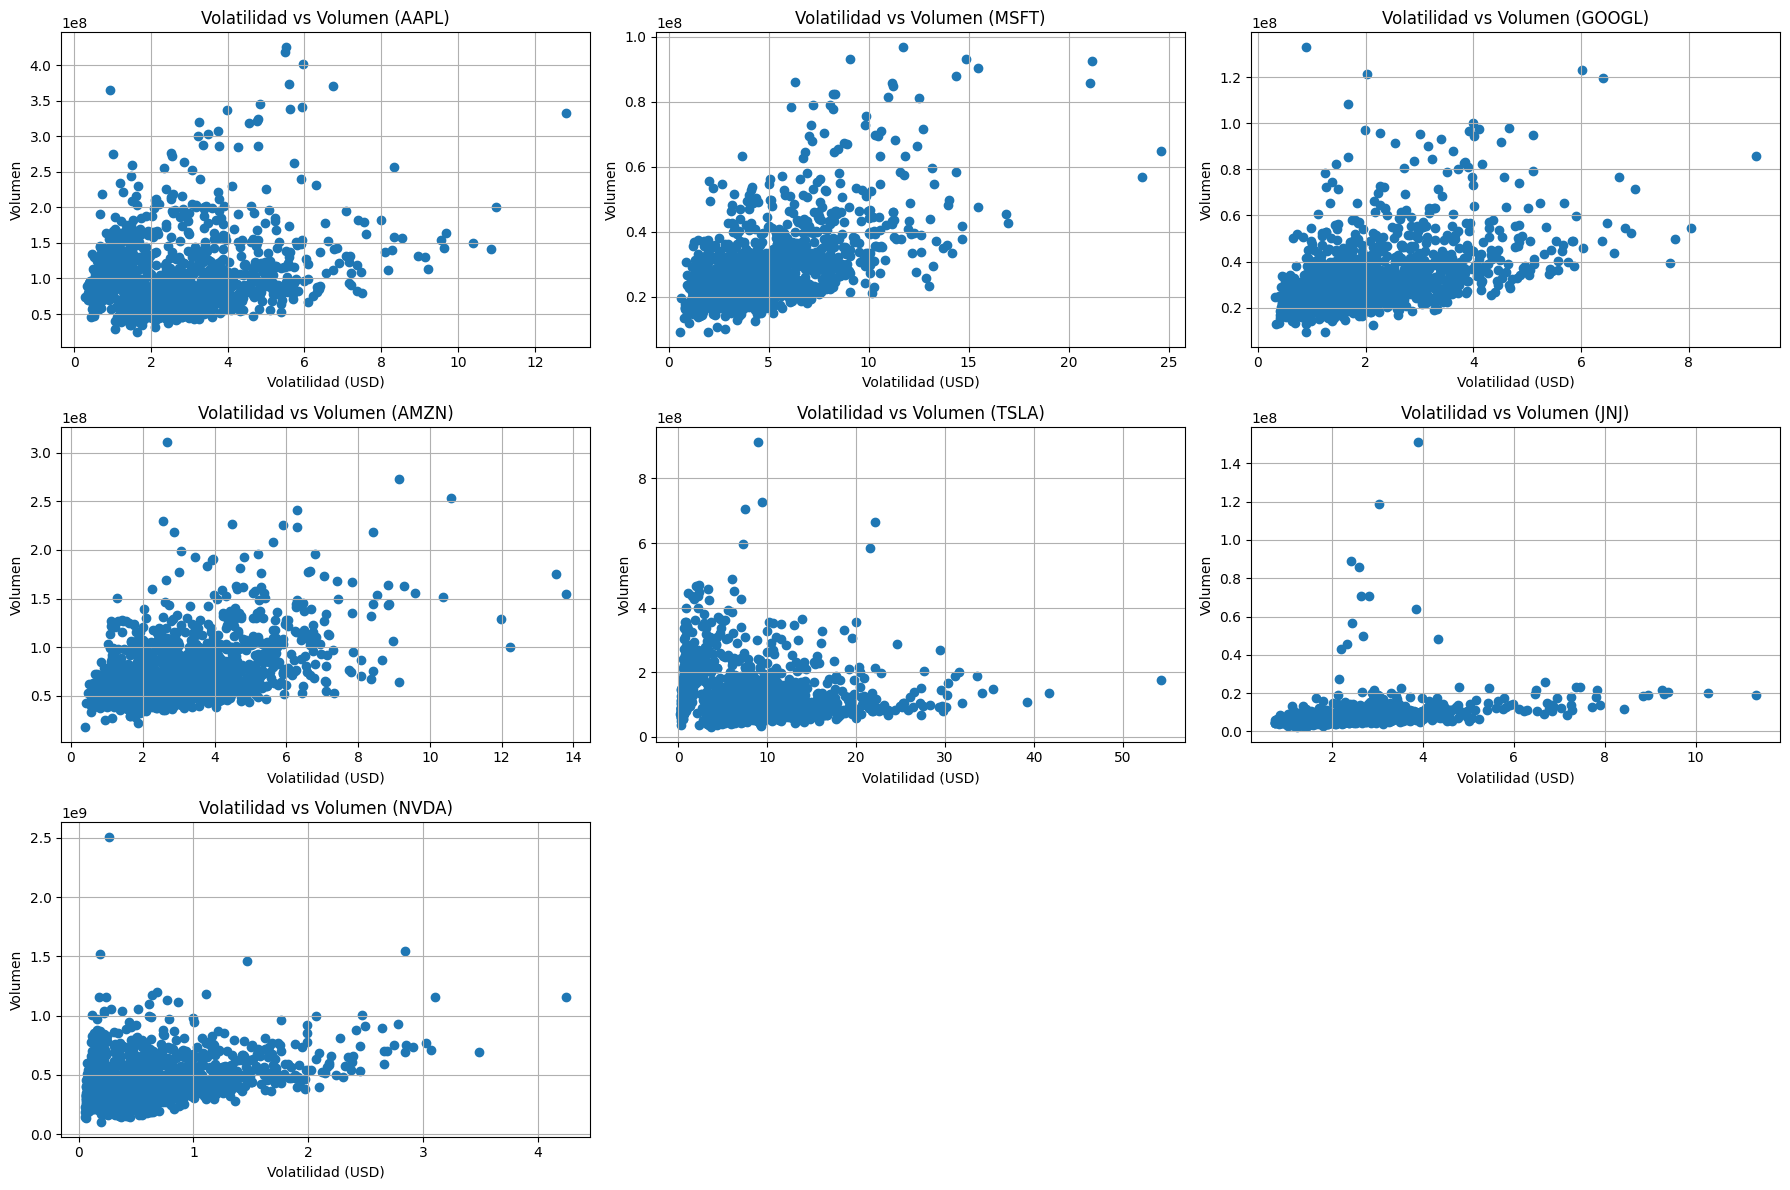

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista de empresas
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JNJ', 'NVDA']

# Descargar datos para cada empresa
data = {ticker: yf.download(ticker, start='2019-01-01', end='2024-01-01') for ticker in tickers}

# Crear una figura con un tamaño adecuado para las 7 subplots
plt.figure(figsize=(18, 12))

# Graficar para cada empresa
for i, ticker in enumerate(tickers, start=1):
    plt.subplot(3, 3, i)
    company_data = data[ticker]
    
    # Calcular la volatilidad diaria
    company_data['Volatility'] = company_data['High'] - company_data['Low']
    
    # Graficar la volatilidad vs Volumen
    plt.scatter(company_data['Volatility'], company_data['Volume'], label=ticker)
    plt.title(f'Volatilidad vs Volumen ({ticker})')
    plt.xlabel('Volatilidad (USD)')
    plt.ylabel('Volumen')
    plt.grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la figura completa
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


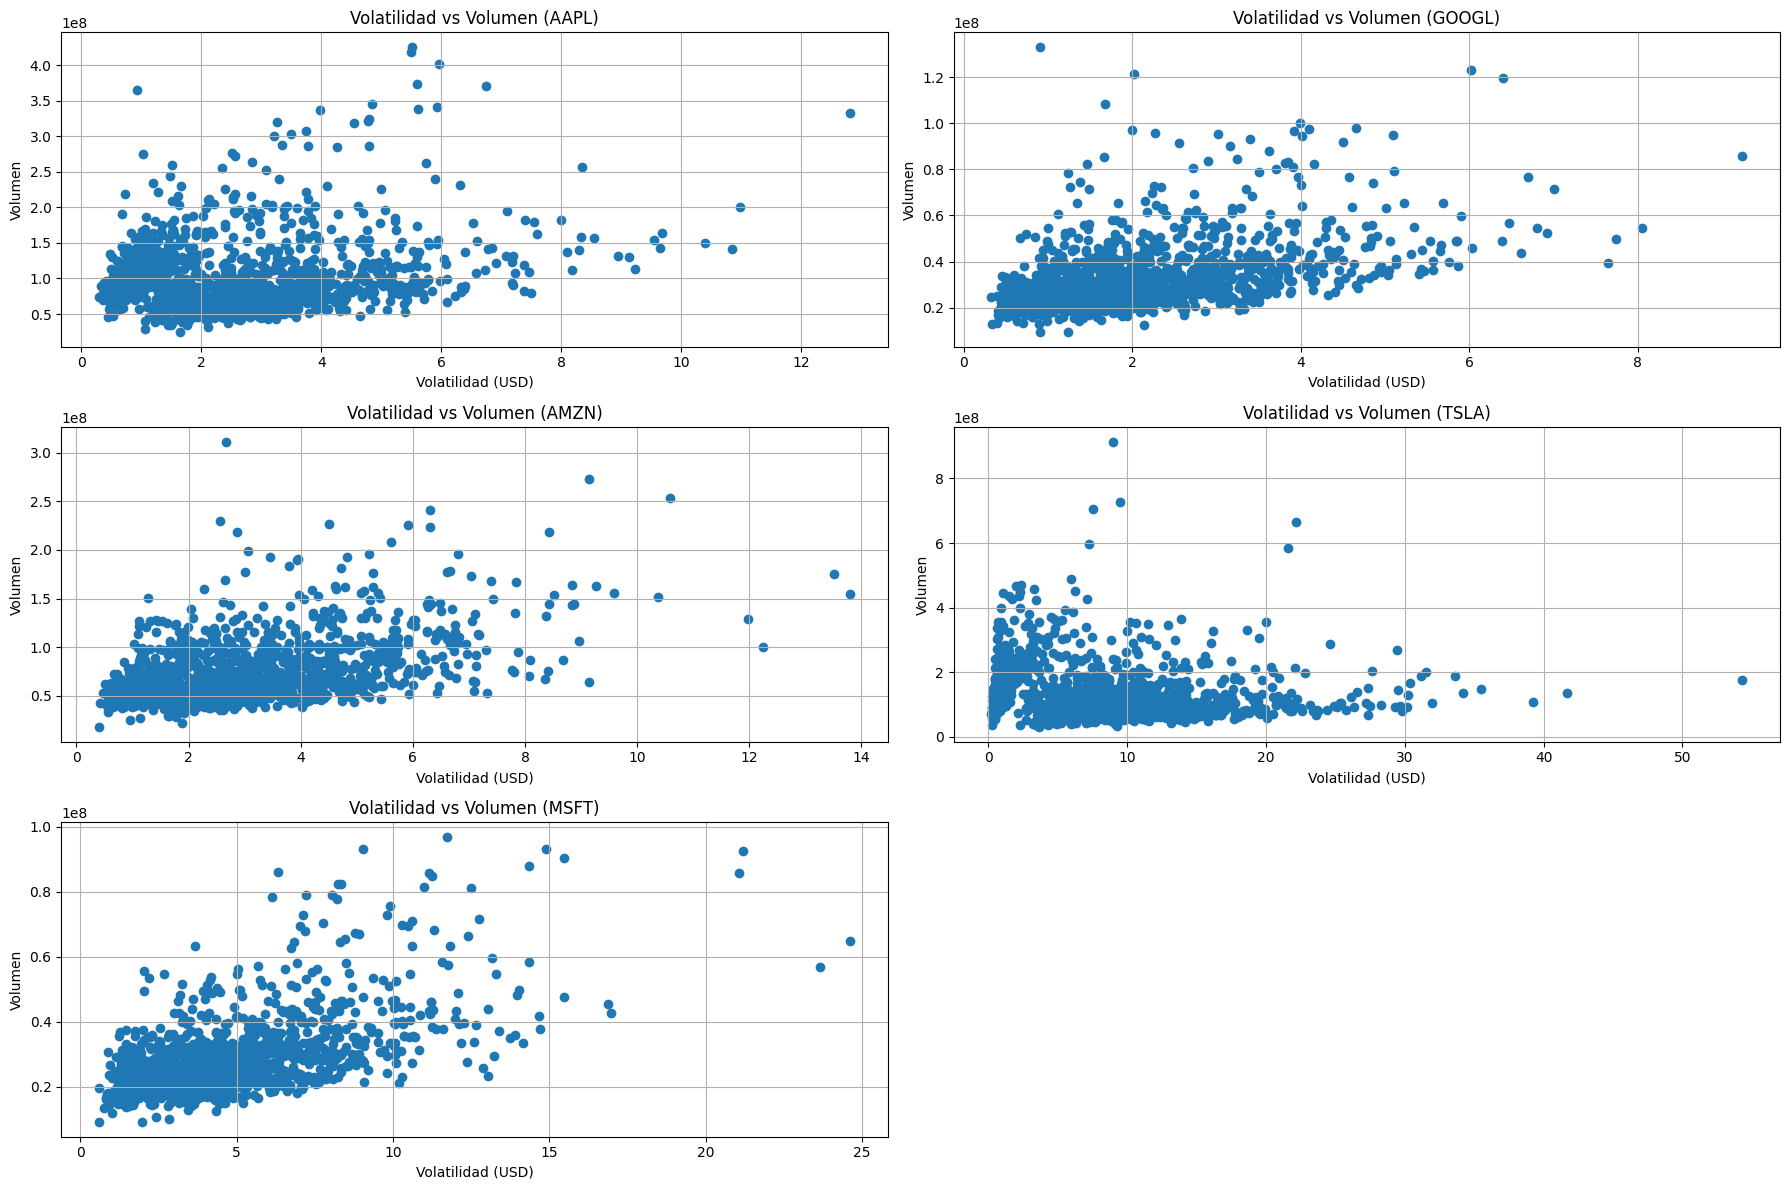

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista de empresas (excluyendo JNJ y NVDA)
tickers = ['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'MSFT']

# Descargar datos para cada empresa
data = {}
for ticker in tickers:
    try:
        company_data = yf.download(ticker, start='2019-01-01', end='2024-01-01')
        if company_data.empty:
            raise ValueError(f"No data for {ticker}")
        data[ticker] = company_data
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")

# Crear una figura con un tamaño adecuado para las 5 subplots
plt.figure(figsize=(18, 12))

# Graficar para cada empresa
for i, ticker in enumerate(tickers, start=1):
    if ticker not in data:
        print(f"Skipping {ticker} due to missing data.")
        continue
    
    plt.subplot(3, 2, i)
    company_data = data[ticker]
    
    # Calcular la volatilidad diaria
    company_data['Volatility'] = company_data['High'] - company_data['Low']
    
    # Graficar la volatilidad vs Volumen
    plt.scatter(company_data['Volatility'], company_data['Volume'], label=ticker)
    plt.title(f'Volatilidad vs Volumen ({ticker})')
    plt.xlabel('Volatilidad (USD)')
    plt.ylabel('Volumen')
    plt.grid(True)

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la figura completa
plt.show()
